In [252]:
#BeautifulSoup
from bs4 import BeautifulSoup
import requests

import re
import pandas as pd

In [253]:
url = "https://www.paruvendu.fr/immobilier/annonceimmofo/liste/listeAnnonces?tt=1&at=1&nbp0=99&pa=FR&lo=75,77,78,91,92,93,94,95&lol=0&ray=50"

In [254]:
all_df = []

#vai so até a pag 500
for page in range(1,501):
    
    req = requests.get(url + "&p=" + str(page))
    soup = BeautifulSoup(req.text, "html.parser")
    
    price = [price.get_text() for price in soup.find_all("div", class_='ergov3-priceannonce')]
    good_prices = [prices.strip().replace("\r\n*", "") for prices in price]
    
    cities = [city.get_text() for city in soup.find_all("cite")]
    good_cities = [cite.strip().replace("\r\n*", "") for cite in cities]
    
    annonceur = [anno.get_text() for anno in soup.find_all("div", class_='ergov3-bottomannonce ergov3-bottomannonce_2lines')]
    good_annonceur = [annonc.strip().replace("\r\n*", "") for annonc in annonceur]
    
    text_annonce = [annonce.get_text() for annonce in soup.find_all("p", class_='txt-long')]
    good_text_annonce = [gta.strip().replace("\r\n*", "") for gta in text_annonce]
    
    title_liste = []
    for title in soup.select('div.ergov3-h3'):
        title_liste.append(title.span.text)
    good_title_liste = [gtl.strip().replace("\s+", " ") for gtl in title_liste]
    
    all_df.append(pd.DataFrame({'Title': good_title_liste, 'Prix': good_prices,'Ville': good_cities, 'Annonceur': good_annonceur, 'Description': good_text_annonce}))
    

out = pd.concat(all_df, ignore_index = True)

In [255]:
out.head()

,Title,Prix,Ville,Annonceur,Description
0,"Maison\r\n10\r\npièces,\t\t\t\t\t\t\t\t\t\t\t\...",440 000 €,La Chapelle-la-Reine (77760),Professionnel\n\n\n\nSAFTI\r\n19996 annonces\t...,Maison de de ville de 270m². située en plein c...
1,"Maison\r\n5\r\npièces,\t\t\t\t\t\t\t\t\t\t\t\t...",289 000 €,Menucourt (95180),Professionnel\n\n\n\nSAFTI\r\n19996 annonces\t...,Quartier familial. patrick barberi vous propos...
2,"Appartement\r\n2\r\npièces,\t\t\t\t\t\t\t\t\t\...",143 000 €,Choisy-le-Roi (94600),Professionnel\n\n\n\nSAFTI\r\n19996 annonces\t...,Appartement à deux pas de la cathédrale saint-...
3,"Appartement\r\n3\r\npièces,\t\t\t\t\t\t\t\t\t\...",169 000 €,Gonesse (95500),Professionnel\n\n\n\nSAFTI\r\n19996 annonces\t...,Appartement 3 pièces. À 7 minutes à pied de la...
4,"Appartement\r\n4\r\npièces,\t\t\t\t\t\t\t\t\t\...",349 500 €,Maisons-Alfort (94700),Professionnel\n\n\n\nSAFTI\r\n19996 annonces\t...,"Refait à neuf, lumineux et calme.. quartier ch..."


In [256]:
out = out.replace(r'\r+|\n+|\t+',' ', regex = True)

In [257]:
out.head()

,Title,Prix,Ville,Annonceur,Description
0,"Maison 10 pièces, 270 m²",440 000 €,La Chapelle-la-Reine (77760),Professionnel SAFTI 19996 annonces Voir l'an...,Maison de de ville de 270m². située en plein c...
1,"Maison 5 pièces, 106 m²",289 000 €,Menucourt (95180),Professionnel SAFTI 19996 annonces Voir l'an...,Quartier familial. patrick barberi vous propos...
2,"Appartement 2 pièces, 28 m²",143 000 €,Choisy-le-Roi (94600),Professionnel SAFTI 19996 annonces Voir l'an...,Appartement à deux pas de la cathédrale saint-...
3,"Appartement 3 pièces, 96 m²",169 000 €,Gonesse (95500),Professionnel SAFTI 19996 annonces Voir l'an...,Appartement 3 pièces. À 7 minutes à pied de la...
4,"Appartement 4 pièces, 59 m²",349 500 €,Maisons-Alfort (94700),Professionnel SAFTI 19996 annonces Voir l'an...,"Refait à neuf, lumineux et calme.. quartier ch..."


In [258]:
#out['Bien'] = out.Title.str.extract(r'(^[a-zA-Z]+)', expand=True)
out['Bien'] = out.Title.str.extract(r'(\S+)', expand=True)
out["Pièces"] = out["Title"].str.extract(r'(\d+)\s*pièces?', expand=False)
out['Taille'] = out["Title"].str.extract(r'(\d+(?:\.\d+)?)\s*m²', expand=False)
out["Annonceur"] = out["Annonceur"].str.extract(r'(^[a-zA-Z]+)', expand=False)
out["Prix"] = out["Prix"].replace(r'€','', regex = True)
out["Code Postal"] = out["Ville"].str.extract(r'(\d+)', expand=False)
#out["Ville"] = out["Ville"].str.extract(r'(.*)\s\(\d+\)', expand=False) #|
out["Ville"] = out["Ville"].str.extract(r'([^0-9]+)\s\(\d+\)', expand=False)

In [259]:
out.head()

,Title,Prix,Ville,Annonceur,Description,Bien,Pièces,Taille,Code Postal
0,"Maison 10 pièces, 270 m²",440 000,La Chapelle-la-Reine,Professionnel,Maison de de ville de 270m². située en plein c...,Maison,10,270,77760
1,"Maison 5 pièces, 106 m²",289 000,Menucourt,Professionnel,Quartier familial. patrick barberi vous propos...,Maison,5,106,95180
2,"Appartement 2 pièces, 28 m²",143 000,Choisy-le-Roi,Professionnel,Appartement à deux pas de la cathédrale saint-...,Appartement,2,28,94600
3,"Appartement 3 pièces, 96 m²",169 000,Gonesse,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...,Appartement,3,96,95500
4,"Appartement 4 pièces, 59 m²",349 500,Maisons-Alfort,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch...",Appartement,4,59,94700


In [260]:
#remove ventes
out = out[out["Bien"].str.contains("Vente") == False]

In [261]:
new_df = out[['Bien', 'Pièces', 'Taille', 'Prix', 'Ville', 'Code Postal', 'Annonceur', 'Description']]

In [262]:
new_df.head()

,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description
0,Maison,10,270,440 000,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...
1,Maison,5,106,289 000,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...
2,Appartement,2,28,143 000,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...
3,Appartement,3,96,169 000,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...
4,Appartement,4,59,349 500,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch..."


In [263]:
#effacer les NaN
new_df.dropna() #fillna("")

,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description
0,Maison,10,270,440 000,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...
1,Maison,5,106,289 000,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...
2,Appartement,2,28,143 000,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...
3,Appartement,3,96,169 000,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...
4,Appartement,4,59,349 500,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch..."
...,...,...,...,...,...,...,...,...
13495,Villa,8,270,774 000,Milly-la-Forêt,91490,Professionnel,Maison - 270m² - milly-la-forêt. votre agence ...
13496,Villa,8,210,432 800,Milly-la-Forêt,91490,Professionnel,Maison - 210m² - milly-la-forêt. votre agence ...
13497,Appartement,3,70,110 000,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...
13498,Maison,3,70,110 000,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...


In [264]:
bien_col = ['Pièces','Taille','Prix','Description']

In [265]:
bien_df = new_df[bien_col]

In [266]:
bien_df.head()

,Pièces,Taille,Prix,Description
0,10,270,440 000,Maison de de ville de 270m². située en plein c...
1,5,106,289 000,Quartier familial. patrick barberi vous propos...
2,2,28,143 000,Appartement à deux pas de la cathédrale saint-...
3,3,96,169 000,Appartement 3 pièces. À 7 minutes à pied de la...
4,4,59,349 500,"Refait à neuf, lumineux et calme.. quartier ch..."


In [267]:
type_df = new_df[["Bien"]]

In [268]:
type(type_df)

pandas.core.frame.DataFrame

In [269]:
loc_col = ['Ville','Code Postal']

In [270]:
loc_df = new_df[loc_col]

In [271]:
loc_df.head()

,Ville,Code Postal
0,La Chapelle-la-Reine,77760
1,Menucourt,95180
2,Choisy-le-Roi,94600
3,Gonesse,95500
4,Maisons-Alfort,94700


In [272]:
ann_df = new_df[["Annonceur"]]

In [273]:
ann_df.head()

,Annonceur
0,Professionnel
1,Professionnel
2,Professionnel
3,Professionnel
4,Professionnel


In [274]:
new_df.head()


,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description
0,Maison,10,270,440 000,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...
1,Maison,5,106,289 000,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...
2,Appartement,2,28,143 000,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...
3,Appartement,3,96,169 000,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...
4,Appartement,4,59,349 500,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch..."


In [275]:
new_df["Departement"]= new_df["Code Postal"].astype(str).str[:2]
new_df.head()

,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description,Departement
0,Maison,10,270,440 000,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...,77
1,Maison,5,106,289 000,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...,95
2,Appartement,2,28,143 000,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...,94
3,Appartement,3,96,169 000,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...,95
4,Appartement,4,59,349 500,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch...",94


In [276]:
import numpy as  np

new_df=new_df.replace([np.inf, -np.inf], np.nan)
new_df=new_df.replace("NC","")
new_df.dropna()
new_df= new_df.dropna()

In [277]:
new_df.isna().sum()

Bien           0
Pièces         0
Taille         0
Prix           0
Ville          0
Code Postal    0
Annonceur      0
Description    0
Departement    0
dtype: int64

In [278]:
new_df["Prix"].value_counts()

399 000     112
199 000     104
299 000      88
499 000      73
315 000      72
           ... 
234 990       1
399 999       1
225 700       1
282 150       1
432 800       1
Name: Prix, Length: 2075, dtype: int64

In [279]:
new_df['Prix'] = new_df['Prix'].str.replace(' ', '')
new_df['Prix']= new_df['Prix'].apply(pd.to_numeric)

new_df.head()



,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description,Departement
0,Maison,10,270,440000.0,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...,77
1,Maison,5,106,289000.0,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...,95
2,Appartement,2,28,143000.0,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...,94
3,Appartement,3,96,169000.0,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...,95
4,Appartement,4,59,349500.0,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch...",94


In [280]:
new_df.dtypes


Bien            object
Pièces          object
Taille          object
Prix           float64
Ville           object
Code Postal     object
Annonceur       object
Description     object
Departement     object
dtype: object

In [281]:


#new_df['Taille'] = new_df['Taille'].str.replace('NA ', '')
new_df['Taille']= new_df['Taille'].apply(pd.to_numeric)


new_df["Pièces"]=new_df["Pièces"].astype(int)
new_df.dtypes

Bien            object
Pièces           int32
Taille           int64
Prix           float64
Ville           object
Code Postal     object
Annonceur       object
Description     object
Departement     object
dtype: object

In [282]:
new_df["Prix"].unique()
new_df["Taille"].unique()
new_df["Departement"].unique()

array(['77', '95', '94', '93', '91', '92', '78', '75', '20', '19'],
      dtype=object)

In [283]:
new_df

,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description,Departement
0,Maison,10,270,440000.0,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...,77
1,Maison,5,106,289000.0,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...,95
2,Appartement,2,28,143000.0,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...,94
3,Appartement,3,96,169000.0,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...,95
4,Appartement,4,59,349500.0,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch...",94
...,...,...,...,...,...,...,...,...,...
13495,Villa,8,270,774000.0,Milly-la-Forêt,91490,Professionnel,Maison - 270m² - milly-la-forêt. votre agence ...,91
13496,Villa,8,210,432800.0,Milly-la-Forêt,91490,Professionnel,Maison - 210m² - milly-la-forêt. votre agence ...,91
13497,Appartement,3,70,110000.0,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...,77
13498,Maison,3,70,110000.0,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...,77


# Data Visualization

## Axes d'analyse:
- Répartition par type de bien
- Répartition par type d'annonceur
- Analyse location - prix
- Analyse surface - prix
- Analyse prix/m2 - location

In [284]:
new_df.describe()

,Pièces,Taille,Prix
count,11182.000000,11182.000000,1.118100e+04
mean,4.199607,96.726078,3.849026e+05
std,1.965048,59.042694,2.536154e+05
min,1.000000,1.000000,1.400000e+04
25%,3.000000,60.000000,2.230000e+05
50%,4.000000,81.000000,3.280000e+05
75%,5.000000,120.000000,4.680000e+05
max,14.000000,1000.000000,3.990000e+06


In [285]:
import geopandas as gpd

In [286]:
geo_df = gpd.read_file(r"C:\Users\claud\Desktop\DEV IA\JOUR 17 bis\departements-ile-de-france.geojson")
geo_df["code"]
type(geo_df)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

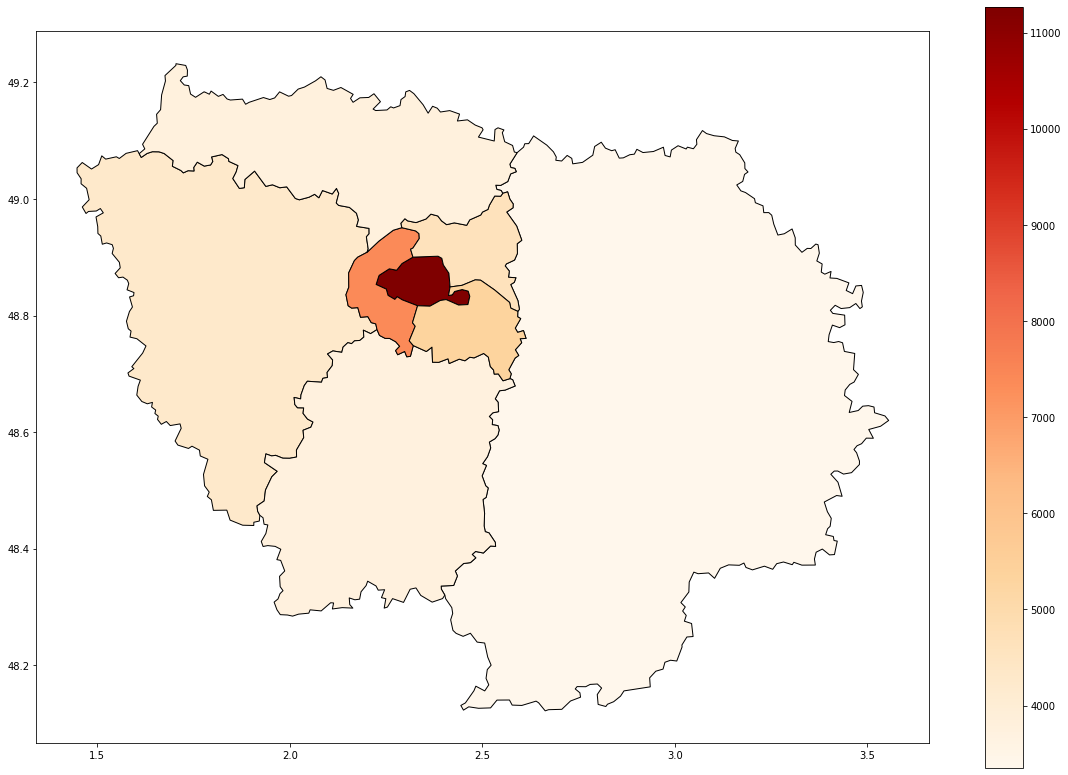

In [287]:
new_df_dept = new_df.merge(geo_df, how="inner", left_on="Departement", right_on="code")



new_df_dept = gpd.GeoDataFrame(new_df_dept, geometry='geometry')


new_df_dept["Prix/m²"]= round(new_df_dept["Prix"]/new_df_dept["Taille"],1)
new_df_dept.dissolve(by = "code", aggfunc="mean").plot(column="Prix/m²", legend=True,cmap='OrRd', figsize=(20, 14), edgecolor = 'k')

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt


### Tracés exploratoires

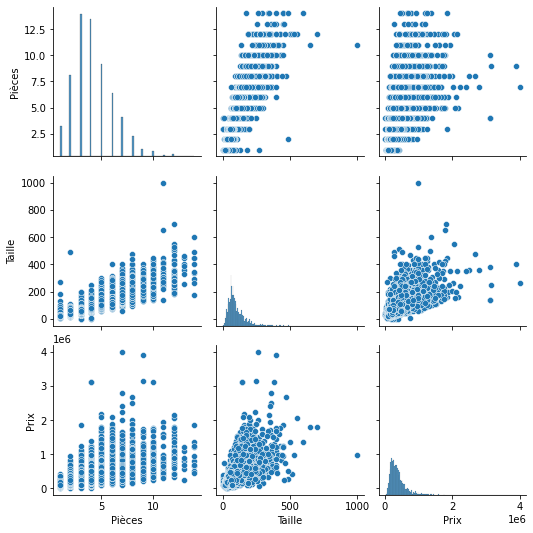

In [289]:
sns.pairplot(new_df)

In [290]:
new_df['ID'] = new_df.index
new_df

,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description,Departement,ID
0,Maison,10,270,440000.0,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...,77,0
1,Maison,5,106,289000.0,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...,95,1
2,Appartement,2,28,143000.0,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...,94,2
3,Appartement,3,96,169000.0,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...,95,3
4,Appartement,4,59,349500.0,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch...",94,4
...,...,...,...,...,...,...,...,...,...,...
13495,Villa,8,270,774000.0,Milly-la-Forêt,91490,Professionnel,Maison - 270m² - milly-la-forêt. votre agence ...,91,13495
13496,Villa,8,210,432800.0,Milly-la-Forêt,91490,Professionnel,Maison - 210m² - milly-la-forêt. votre agence ...,91,13496
13497,Appartement,3,70,110000.0,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...,77,13497
13498,Maison,3,70,110000.0,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...,77,13498


<function matplotlib.pyplot.show(close=None, block=None)>

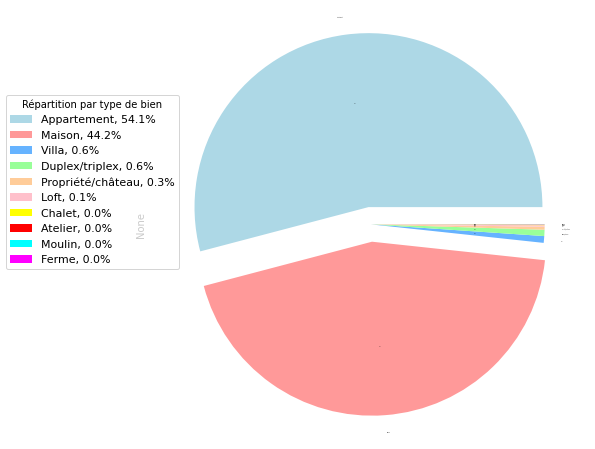

In [291]:
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['#add8e6','#ff9999','#66b3ff','#99ff99','#ffcc99','pink','yellow','red','cyan','magenta']
#data_fr= new_df.groupby(['Bien']).sum()
data_fr= new_df.value_counts('Bien')
ax= data_fr.plot(kind='pie', autopct='%1.0f%%', colors = colors, fontsize= 0, 
            subplots='true',figsize=(10,8),explode = explode)

#df2val = new_df.value_counts('Bien')
percents = data_fr.to_numpy() * 100 / data_fr.to_numpy().sum()
plt.legend(loc='upper left',
    labels=['%s, %1.1f%%' % (
        l,s) for l, s in zip(data_fr.index,percents)], 
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    title="Répartition par type de bien")
plt.show




<AxesSubplot:title={'center':"Répartition par type d'annonceur"}, ylabel='ID'>

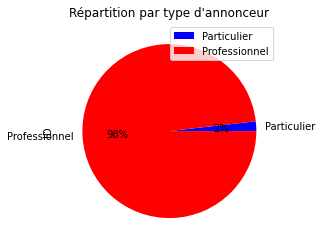

In [292]:
new_df.groupby(['Annonceur']).sum().plot(kind='pie', y='ID', autopct='%1.0f%%', colors = ['blue','red'],
                                title="Répartition par type d'annonceur")

# 1. Analyse location-prix

In [293]:
new_df['taille_group'] = pd.cut(new_df.Taille, range(0, 1100, 50))
new_df['taille_group']


0        (250, 300]
1        (100, 150]
2           (0, 50]
3         (50, 100]
4         (50, 100]
            ...    
13495    (250, 300]
13496    (200, 250]
13497     (50, 100]
13498     (50, 100]
13499     (50, 100]
Name: taille_group, Length: 11182, dtype: category
Categories (21, interval[int64, right]): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (850, 900] < (900, 950] < (950, 1000] < (1000, 1050]]

Text(0.5, 1.0, 'Distribution des biens par rapport au taille et prix dans les departements')

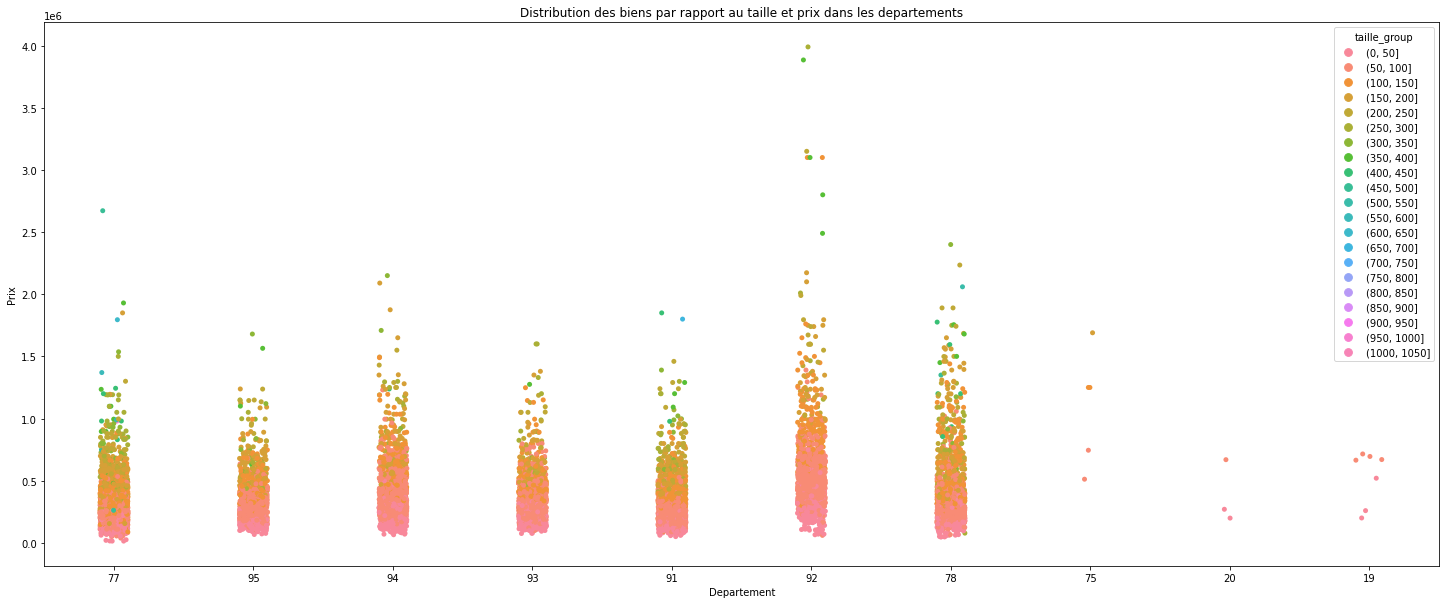

In [294]:

fig, ax = plt.subplots(figsize=(25, 10))
sns.stripplot(x="Departement", y="Prix", hue='taille_group', data = new_df, jitter=True, ax=ax).set_title('Distribution des biens par rapport au taille et prix dans les departements')

#### Il semble que certains departements soient en effet meilleurs que d'autres, puisque les biens de même taille y sont plus chers. Traçons la distribution pour voir cela plus en détail.

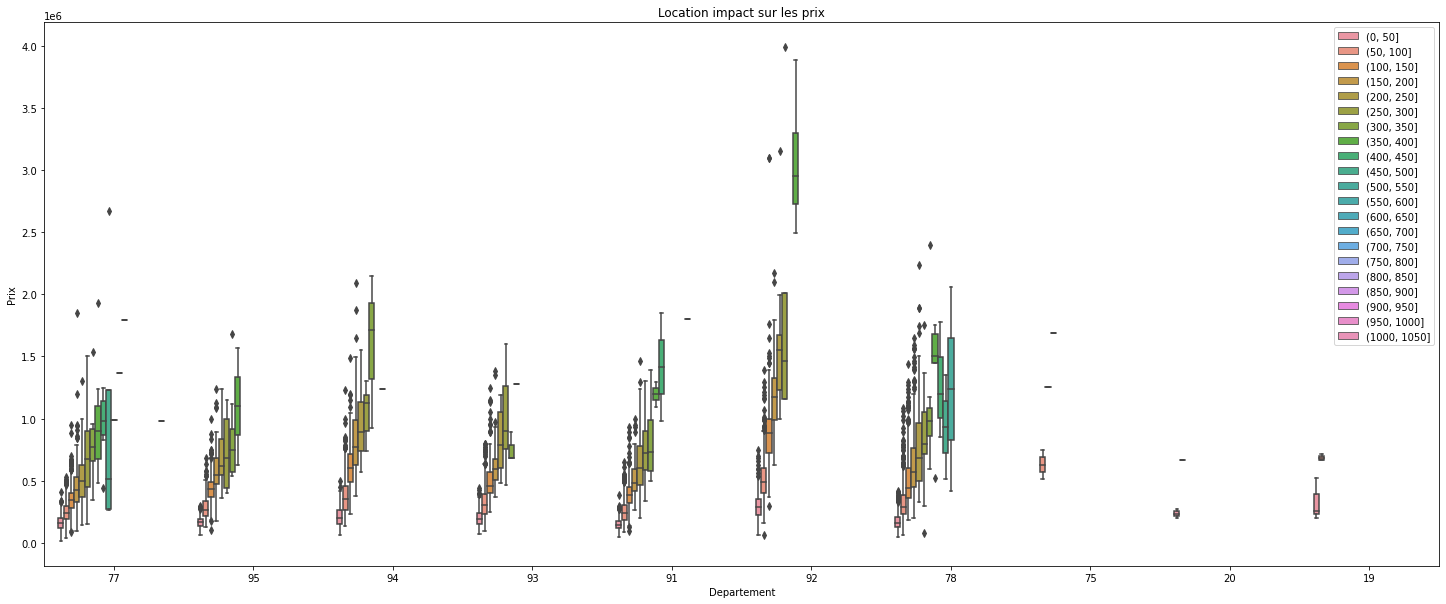

In [295]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x="Departement", y="Prix", hue='taille_group', data=new_df, ax=ax, ).set_title('Location impact sur les prix')

plt.legend(loc='upper right')

C:\Users\claud\AppData\Local\Temp\ipykernel_22048\3753752332.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 6))


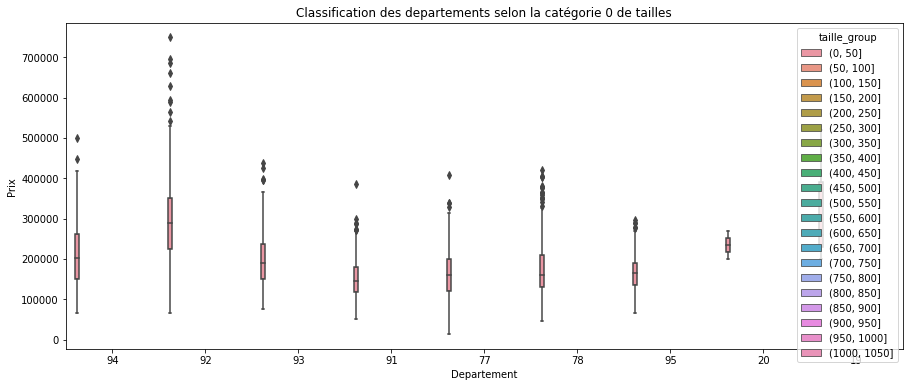

<Figure size 432x288 with 0 Axes>

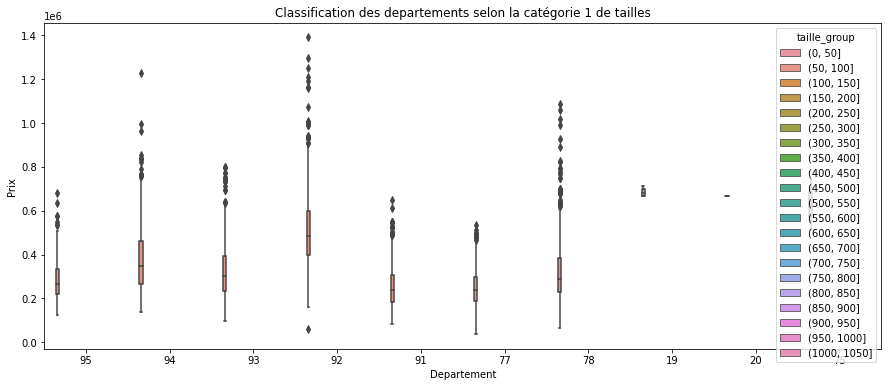

<Figure size 432x288 with 0 Axes>

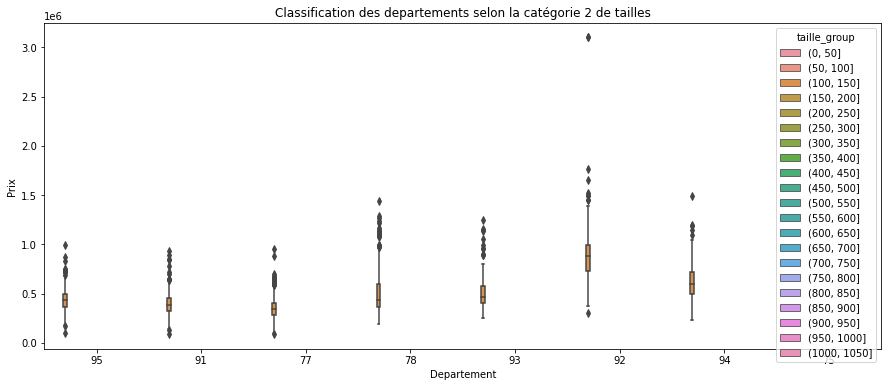

<Figure size 432x288 with 0 Axes>

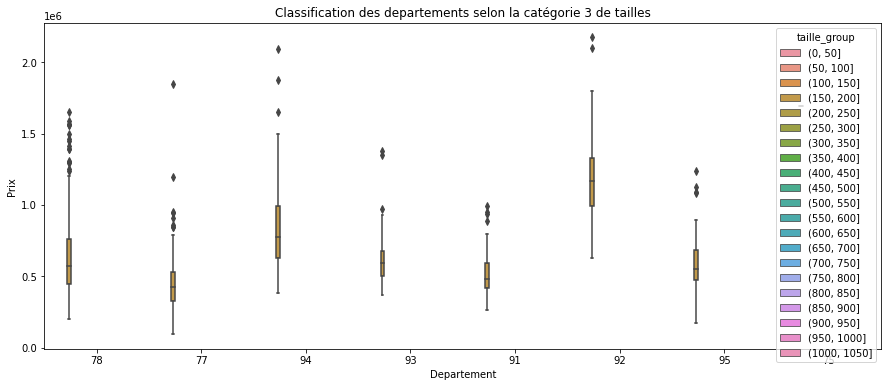

<Figure size 432x288 with 0 Axes>

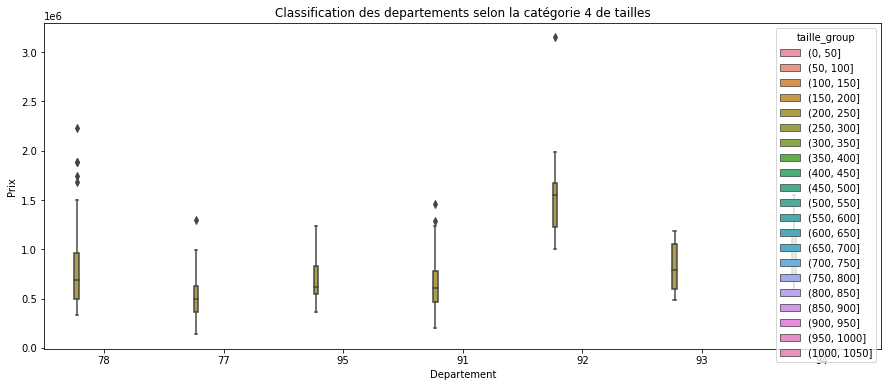

<Figure size 432x288 with 0 Axes>

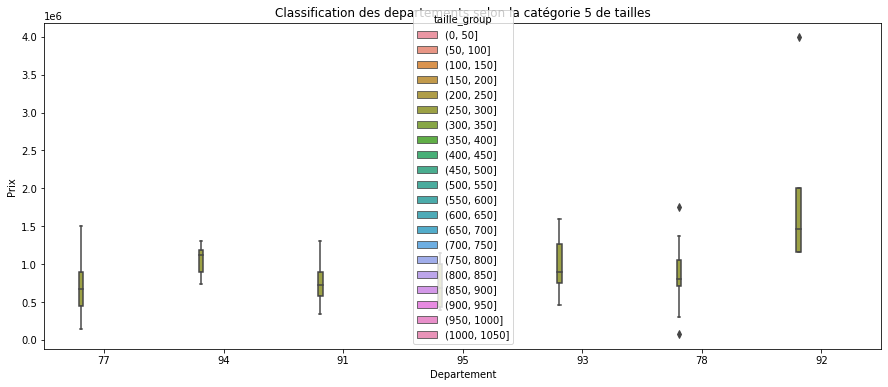

<Figure size 432x288 with 0 Axes>

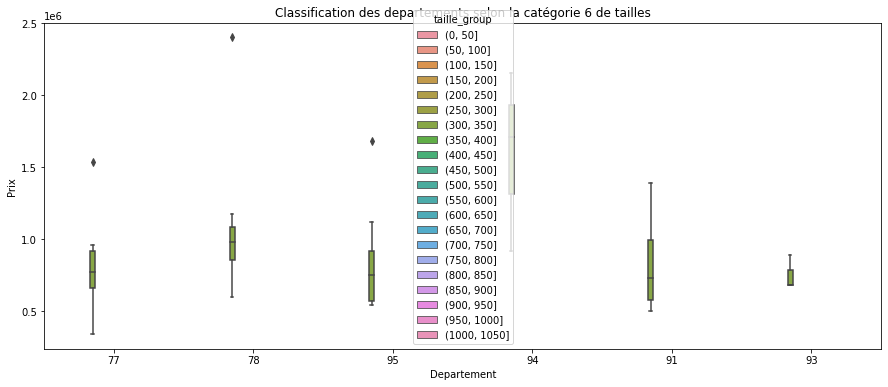

<Figure size 432x288 with 0 Axes>

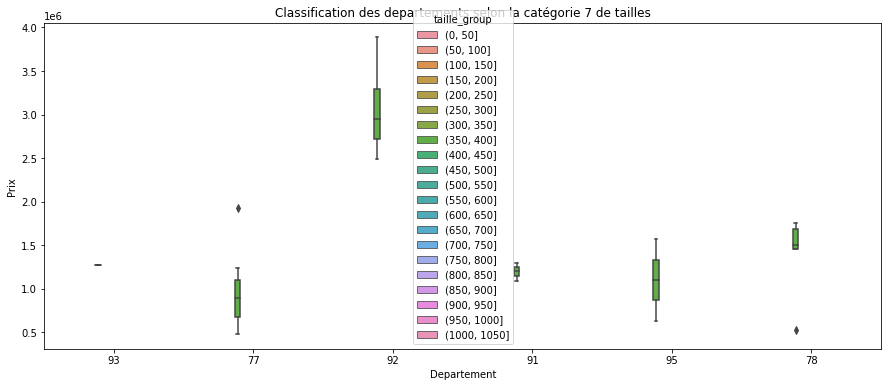

<Figure size 432x288 with 0 Axes>

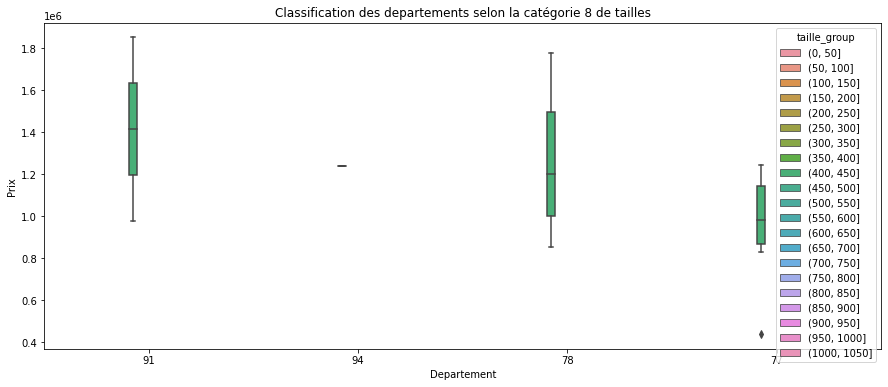

<Figure size 432x288 with 0 Axes>

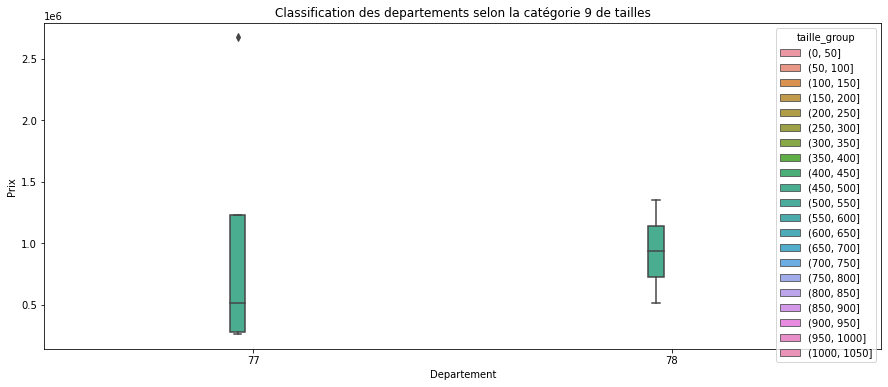

<Figure size 432x288 with 0 Axes>

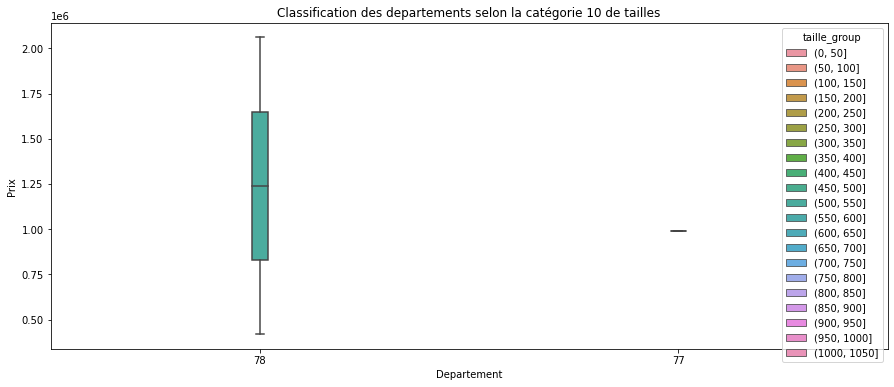

<Figure size 432x288 with 0 Axes>

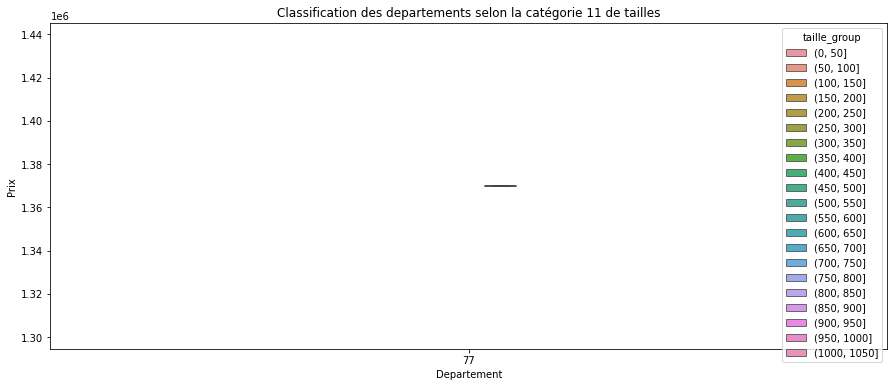

<Figure size 432x288 with 0 Axes>

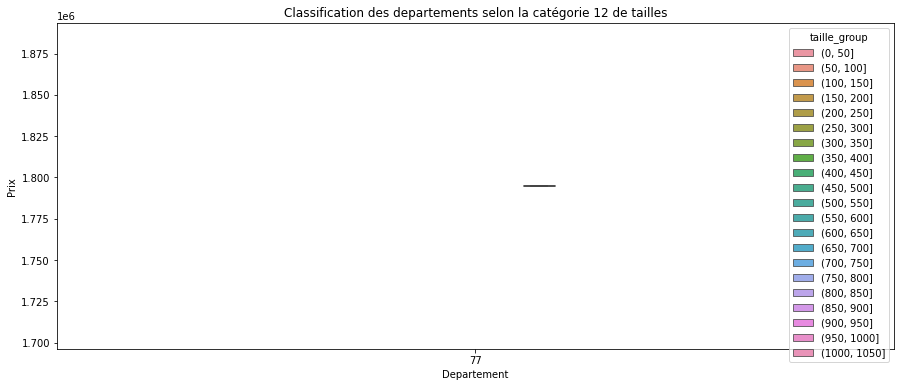

<Figure size 432x288 with 0 Axes>

In [296]:
for i in range(0,13):   
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.figure()
    sns.boxplot(x="Departement", y="Prix", data=new_df[new_df.taille_group == new_df.taille_group.cat.categories[i]], hue='taille_group', ax=ax).set_title('Classification des departements selon la catégorie ' +str(i) + ' de tailles')
 
plt.show()  

  


In [297]:
new_df['ID'] = new_df.index
new_df

,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description,Departement,ID,taille_group
0,Maison,10,270,440000.0,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...,77,0,"(250, 300]"
1,Maison,5,106,289000.0,Menucourt,95180,Professionnel,Quartier familial. patrick barberi vous propos...,95,1,"(100, 150]"
2,Appartement,2,28,143000.0,Choisy-le-Roi,94600,Professionnel,Appartement à deux pas de la cathédrale saint-...,94,2,"(0, 50]"
3,Appartement,3,96,169000.0,Gonesse,95500,Professionnel,Appartement 3 pièces. À 7 minutes à pied de la...,95,3,"(50, 100]"
4,Appartement,4,59,349500.0,Maisons-Alfort,94700,Professionnel,"Refait à neuf, lumineux et calme.. quartier ch...",94,4,"(50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...
13495,Villa,8,270,774000.0,Milly-la-Forêt,91490,Professionnel,Maison - 270m² - milly-la-forêt. votre agence ...,91,13495,"(250, 300]"
13496,Villa,8,210,432800.0,Milly-la-Forêt,91490,Professionnel,Maison - 210m² - milly-la-forêt. votre agence ...,91,13496,"(200, 250]"
13497,Appartement,3,70,110000.0,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...,77,13497,"(50, 100]"
13498,Maison,3,70,110000.0,Coulommiers,77120,Professionnel,Maison de ville proche coulommiers 3 pièces 70...,77,13498,"(50, 100]"


In [298]:
pivot_table = new_df.pivot_table(index='Departement', columns=['taille_group'], values='Prix')
pivot_table

taille_group,"(0, 50]","(50, 100]","(100, 150]","(150, 200]","(200, 250]","(250, 300]","(300, 350]","(350, 400]","(400, 450]","(450, 500]","(500, 550]","(550, 600]","(600, 650]","(650, 700]","(950, 1000]"
Departement,,,,,,,,,,,,,,,
19,326333.333333,686250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,234500.000000,669000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,628500.000000,1.250000e+06,1.690000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,163304.223881,249182.116038,3.490150e+05,4.441021e+05,5.215061e+05,7.061718e+05,7.858064e+05,9.298538e+05,9.455833e+05,990950.0,990000.0,1370000.0,1795000.0,NaN,980000.0
78,181262.568075,320936.050432,5.107517e+05,6.751591e+05,7.998519e+05,8.639530e+05,1.123143e+06,1.380800e+06,1.260083e+06,933750.0,1240000.0,NaN,NaN,NaN,NaN
91,153100.702422,254676.582468,3.970737e+05,5.151498e+05,6.421759e+05,7.567375e+05,7.960000e+05,1.194000e+06,1.413750e+06,NaN,NaN,NaN,NaN,1800000.0,NaN
92,293624.112583,512499.188131,9.152018e+05,1.201894e+06,1.548671e+06,1.955000e+06,NaN,3.068750e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,200987.350000,326750.746106,5.085532e+05,6.289384e+05,8.062810e+05,9.986273e+05,7.530000e+05,1.275000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,212109.345324,379053.988920,6.184353e+05,8.403310e+05,9.388088e+05,1.066615e+06,1.593000e+06,NaN,1.238000e+06,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='taille_group', ylabel='Departement'>

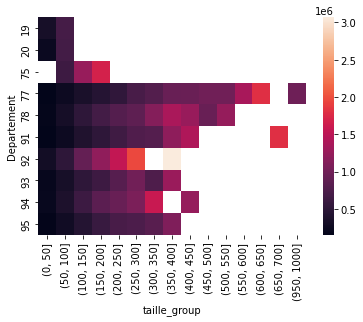

In [299]:
sns.heatmap(pivot_table)

In [300]:
# pip install geopandas / conda install geopandas
# si erreur, essaye dans cette ordre: 
# pip install wheel
#pip install pipwin

#pipwin install numpy
#pipwin install pandas
#pipwin install shapely
#pipwin install gdal
#pipwin install fiona
#pipwin install pyproj
#pipwin install rtree
#pipwin install geopandas
import geopandas as gpd

In [301]:
# télécharger local de https://github.com/gregoiredavid/france-geojson/tree/master/regions/ile-de-france

geo_df = gpd.read_file(r"C:\Users\claud\Desktop\DEV IA\JOUR 17 bis\departements-ile-de-france.geojson")
#select juste les codes des departements
geo_df["code"]
type(geo_df)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

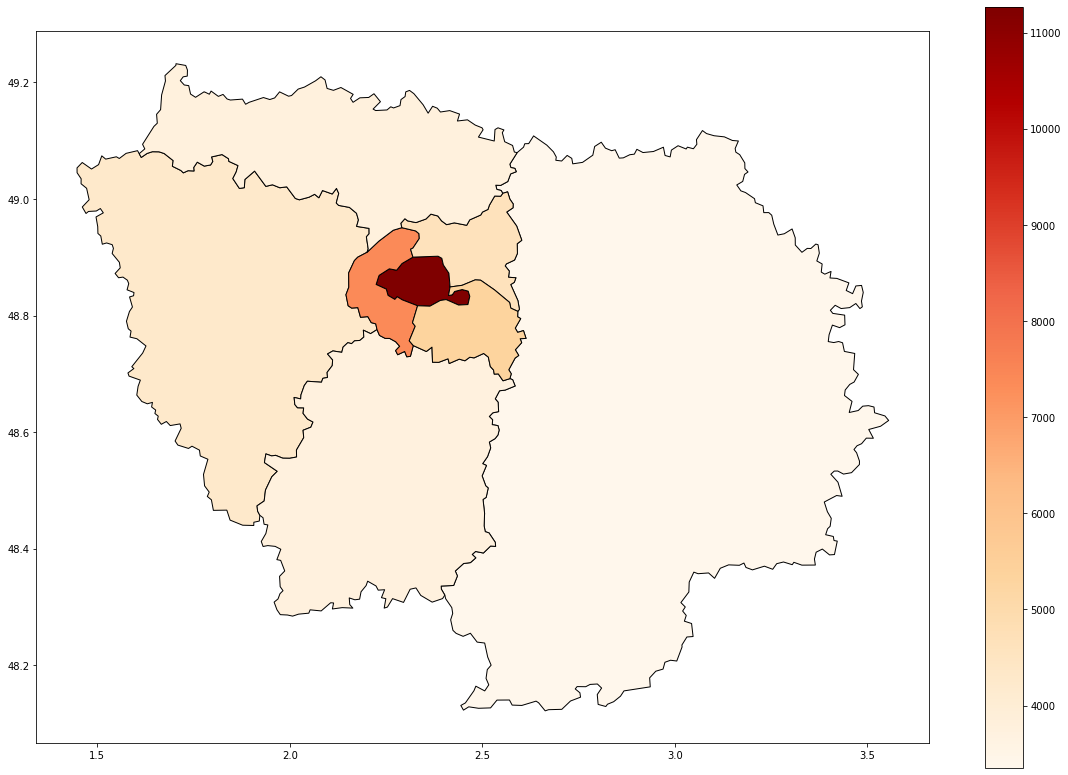

In [302]:
# merge les 2 df: new_df et geo_df, pour chaque les colonnes Departement et Code

new_df_dept = new_df.merge(geo_df, how="inner", left_on="Departement", right_on="code")


# transforme en format geopandas
new_df_dept = gpd.GeoDataFrame(new_df_dept, geometry='geometry')

# plot 
new_df_dept["Prix/m²"]= round(new_df_dept["Prix"]/new_df_dept["Taille"],1)
new_df_dept.dissolve(by = "code", aggfunc="mean").plot(column="Prix/m²", legend=True,cmap='OrRd', figsize=(20, 14), edgecolor = 'k')

In [303]:
import folium



In [304]:
geo_df.head()

,code,nom,geometry
0,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.56579 49.01240, ..."
1,75,Paris,"POLYGON ((2.31989 48.90046, 2.38515 48.90201, ..."
2,78,Yvelines,"POLYGON ((2.20059 48.90868, 2.17652 48.90035, ..."
3,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ..."
4,77,Seine-et-Marne,"POLYGON ((2.57165 48.69202, 2.57522 48.70037, ..."


In [305]:
new_df_dept.head()


,Bien,Pièces,Taille,Prix,Ville,Code Postal,Annonceur,Description,Departement,ID,taille_group,code,nom,geometry,Prix/m²
0,Maison,10,270,440000.0,La Chapelle-la-Reine,77760,Professionnel,Maison de de ville de 270m². située en plein c...,77,0,"(250, 300]",77,Seine-et-Marne,"POLYGON ((2.57165 48.69202, 2.57522 48.70037, ...",1629.6
1,Maison,6,129,267000.0,Bazoches-lès-Bray,77118,Professionnel,Maison d'habitation type f6. dans un charmant ...,77,8,"(100, 150]",77,Seine-et-Marne,"POLYGON ((2.57165 48.69202, 2.57522 48.70037, ...",2069.8
2,Appartement,4,86,299500.0,Chelles,77500,Professionnel,Magnifique appartement grand f3 avec beaucoup ...,77,16,"(50, 100]",77,Seine-et-Marne,"POLYGON ((2.57165 48.69202, 2.57522 48.70037, ...",3482.6
3,Maison,3,66,140000.0,Beton-Bazoches,77320,Professionnel,Maison familiale 3 pièces avec cheminée. maiso...,77,19,"(50, 100]",77,Seine-et-Marne,"POLYGON ((2.57165 48.69202, 2.57522 48.70037, ...",2121.2
4,Maison,4,179,222000.0,La Ferté-sous-Jouarre,77260,Professionnel,"Atypique maison briarde, logement à l'étage av...",77,20,"(150, 200]",77,Seine-et-Marne,"POLYGON ((2.57165 48.69202, 2.57522 48.70037, ...",1240.2


In [306]:
new_df_dept.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11172 entries, 0 to 11171
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Bien          11172 non-null  object  
 1   Pièces        11172 non-null  int32   
 2   Taille        11172 non-null  int64   
 3   Prix          11171 non-null  float64 
 4   Ville         11172 non-null  object  
 5   Code Postal   11172 non-null  object  
 6   Annonceur     11172 non-null  object  
 7   Description   11172 non-null  object  
 8   Departement   11172 non-null  object  
 9   ID            11172 non-null  int64   
 10  taille_group  11172 non-null  category
 11  code          11172 non-null  object  
 12  nom           11172 non-null  object  
 13  geometry      11172 non-null  geometry
 14  Prix/m²       11171 non-null  float64 
dtypes: category(1), float64(2), geometry(1), int32(1), int64(2), object(8)
memory usage: 1.2+ MB


## Create a Choropleth Map Using Folium
### Step1: Initiate a base folium map

In [307]:
m_fr = folium.Map(location=[48.87, 2.35], zoom_start=12)
m_fr

### Step2: Add Choropleth Map Layer to the Base Map

In [308]:
custom_scale = (new_df_dept['Prix'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()
folium.Choropleth(
            geo_data=r'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions/ile-de-france/departements-ile-de-france.geojson',
            data= new_df_dept,
            columns=['code', 'Prix'],  #Here we tell folium to get the departement code and plot Prix for each departement
            key_on='feature.properties.code', #Here we grab the geometries/county boundaries from the geojson file using the key 'code' which is the same as dep code
            threshold_scale=custom_scale, #use the custom scale we created for legend
            fill_color='YlOrRd',
            nan_fill_color="White", #Use white color if there is no data available for the county
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='Répartition prix par departement', #title of the legend
            highlight=True,
            line_color='black').add_to(m_fr)
m_fr

### Step3: Add Customized Tooltips to the Map

In [309]:
from folium.features import GeoJsonTooltip

In [310]:
folium.features.GeoJson(
                    data= new_df_dept,
                    name='Répartition prix par departement',
                    smooth_factor= 2,
                    style_function= lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                    tooltip= folium.features.GeoJsonTooltip(
                        fields=['Annonceur',
                                'Description',                                
                                'Departement'                               
                               ],
                        aliases=["Annonce:",
                                 "Description:",                                
                                 "Code Postal:"                                
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(m_fr)
m_fr

TypeError: Object of type Interval is not JSON serializable